In [100]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

### Chapter 3
#### 3.7

In [99]:
df = pd.read_stata('cps09mar.dta')
df['experience'] = df.age - df.education - 6
df['wage'] = np.log(df.earnings/(df.hours*df.week))
df['exp^2'] = df.experience**2/100

# married, black, female with 12 years potential work experience
# N=20

df1 = df[(df.female==1) & (df.race==2) 
           & (df.marital<=2) & (df.experience==12)]

# wage ~ education
y = np.matrix(df1.wage).T
X = np.matrix([np.ones(len(subdf)), df1.education])

numerator = X@y
# print(numerator)
denominator = X@X.T
# print(denominator)

result = np.linalg.inv(denominator)@numerator
a, b = result[0,0], result[1,0]
print(f'log(wage) = {a:.3f} + {b:.3f} education')

mod = smf.ols(formula='wage ~ education', data=df1).fit()
a,b = mod.params

log(wage) = 0.698 + 0.155 education


#### 3.18

In [137]:
xs = np.random.uniform(1,10, size=25)
ys = np.empty(len(xs))

for i, x in enumerate(xs):
    ys[i] = np.random.normal(loc=x, scale=2)

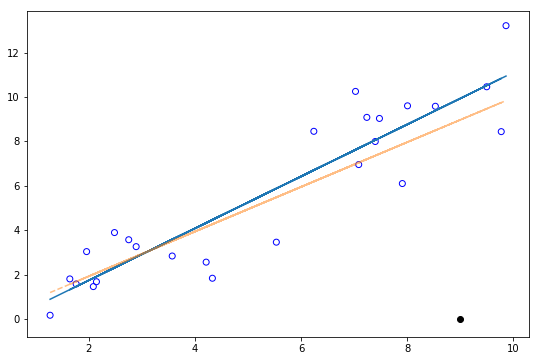

In [152]:
pnt = (9,0)

# regress without
b0, a0 = np.polyfit(xs,ys,1)
reg1 = a0+b0*xs

b1,a1 = np.polyfit(np.append(xs,9), np.append(ys,0),1)
reg2 = a1+b1*xs

fig, ax = plt.subplots(figsize=(9,6))

ax.scatter(xs, ys, facecolor='None', edgecolor='b')
ax.scatter(9,0, c='k')
ax.plot(xs, reg1)
ax.plot(xs, reg2, ls='dashed', alpha=0.5)

plt.show()